In [360]:
#coding=gbk
import math
import random
import matplotlib.pyplot as plt
import time
from decimal import *
getcontext().prec=36
class algorithm():
    def __init__(self,theta,s,r,gamma,L):
        self.Tn_1 = [[Decimal(1)]]
        self.Tn = [[Decimal(0)],[Decimal(1),Decimal(1)]]
        self.fn = [[Decimal(0)]]
        self.fnbar = [[Decimal(0)]]
        self.Zt = [[Decimal(1)]]
        self.Ln = 0
        self.n = 1
        self.theta = theta
        self.s = s
        self.r = r
        self.gamma = gamma
        self.ZnX = []
        self.f_star = [[Decimal(1)/(Decimal(j)) for i in range(j)] for j in range(1,L+2)]
        self.Su = []
        self.Time = []
        self.storage = []
        self.cc_B4 = -math.pi**4/48
        
    def renew(self):
        self.Tn_1 = [[Decimal(1)]]
        self.Tn = [[Decimal(0)],[Decimal(1),Decimal(1)]]
        self.fn = [[Decimal(0)]]
        self.fnbar = [[Decimal(0)]]
        self.Zt = [[Decimal(1)]]
        self.Ln = 0
        self.n = 1
        self.ZnX = []
        self.Su = []
        self.Time = []
        self.storage = []
    
    def updating_Zt(self):
        if self.Ln > 1:	
            omega_Ln = (2*self.Ln+1)**(-2*self.s)
            TN = []
            self.Zt.append([Decimal(0) for i in range(self.Ln+1)])
            for i in range(2):
                self.Tn_1.append([Decimal(0) for j in range(self.Ln+i)])
            TN.append([-self.Tn_1[0][0]])
            self.Zt[0][0] += omega_Ln*TN[0][0]
            for i in range(1,self.Ln+1):
                D = self.Tn[i-1][:]
                D.insert(0,Decimal(0))
                E = self.Tn[i-1][:]
                E.append(Decimal(0))
                TN.append([ 2*(j+k)-l for j,k,l in zip(D,E,self.Tn_1[i])])
                self.Zt[i] = [ j + omega_Ln*k for j,k in zip(self.Zt[i],TN[-1])]
            self.Tn_1 = self.Tn[:]
            self.Tn = TN[:]
        elif self.Ln == 0:
            self.Zt = [[Decimal(1)]]
        elif self.Ln == 1:
            self.Zt.append([(Decimal(2*self.Ln+1))**(-2*self.s)*i for i in self.Tn[-1]])
            
    def fn_cal(self,x1,x2):
        fx = self.fn[0][0]
        L = len(self.fn)
        Xi = [Decimal(1)]
        for i in range(1,L):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            fx += sum([j*k for j,k in zip(Xi,self.fn[i])])
        return fx
    
    def fnbar_cal(self,x1,x2):
        fx = self.fnbar[0][0]
        L = len(self.fnbar)
        Xi = [Decimal(1)]
        for i in range(1,L):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            fx += sum([j*k for j,k in zip(Xi,self.fnbar[i])])
        return fx

    def ZnXcal(self,x1,x2):
        self.ZnX = [self.Zt[0][:]]
        Xi = [Decimal(1)]
        L = len(self.Zt)
        for i in range(1,L):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            self.ZnX.append([ j*k for j,k in zip(self.Zt[i],Xi)])

    def ZnT(self,x1,x2):
        self.ZnXcal(x1,x2)
        S = self.ZnX[0][0]
        Xi = [Decimal(1)]
        for i in range(1,len(self.ZnX)):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            S += sum([ j*k for j,k in zip(self.ZnX[i],Xi)])
        return S 
    def algorithm_f(self,X,Y):
        coe = self.gamma*(Y - self.fn_cal(X[0],X[1]))
        if self.Ln+2 < self.n**self.theta:
            self.Ln += 1 
            self.updating_Zt()
            B = [Decimal(0) for i in range(self.Ln+1)]
            self.fn.append(B[:])
            self.fnbar.append(B[:])
        self.ZnXcal(X[0],X[1])
        for l in range(self.Ln+1):
            self.fn[l] = [ j + coe*k for j,k in zip(self.fn[l],self.ZnX[l])]
            self.fnbar[l] = [ Decimal(self.n)*j/(Decimal(self.n) + 1) + k/(Decimal(self.n) + 1) for j,k in zip(self.fnbar[l],self.fn[l])]

    def grho_cal(self,theta):
        t = theta/(2*math.pi)
        return (t**4-2*(t**3)+t**2-1/30)*self.cc_B4
    
    def construct_data(self):
        theta = 2*math.pi*random.random()
        Y = self.grho_cal(theta)
        Z = Y + random.gauss(0,0.5)
        return [theta,Z,Y]
    
    """def fstar_cal(self,x1,x2):
        fx = self.f_star[0][0]
        L = len(self.f_star)
        Xi = [Decimal(1)]
        for i in range(1,L):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            fx += sum([j*k for j,k in zip(Xi,self.f_star[i])])
        return fx

    def construct_data(self):
        angle = 2*math.pi*random.random()
        X = [Decimal(math.cos(angle)),Decimal(math.sin(angle))]
        Y = self.fstar_cal(X[0],X[1])
        Z = Y + Decimal(random.uniform(-0.2,0.2))
        return [X,Z,Y]"""

    """def computation(self):
        Lf = len(self.fn)
        Ls = len(self.f_star)
        S = Decimal(0)
        if Lf <= Ls :
            for i in range(Lf):
                S += sum([(k-j)**2 for k,j in zip(self.fn[i],self.f_star[i])])
            for i in range(Lf-1,Ls):
                S += sum([j**2 for j in self.f_star[i]])
        else:
            for i in range(Ls):
                S += sum([(k-j)**2 for k,j in zip(self.fn[i],self.f_star[i])])
            for i in range(Ls-1,Lf):
                S += sum([j**2 for j in self.fn[i]])
        return S"""

    def updating(self,n):
        e = self.Ln
        for i in range(n):
            self.n = i
            Data = self.construct_data()
            self.X = [Decimal(math.cos(Data[0])),Decimal(math.sin(Data[0]))]
            self.algorithm_f(self.X,Decimal(Data[1]))
            if (self.n+1)%10001==0:
                #print('b',self.computation())
                print('a',self.Ln)
                print(i/10001)
            '''if self.n%500 == 0:
                end_time = time.time()
                run_time = end_time - start_time 
                self.Time.append(math.log10(float(run_time+10**(-8))))
                S = 0
                for j in range(1000):
                    Z = self.construct_data()
                    S +=(self.fnbar_cal(Z[0][0],Z[0][1])-Z[2])**2
                self.Su.append(Decimal(math.log10(S/200)))
                self.storage.append(math.log10(sum([len(kk) for kk in self.fnbar])+10**(-8)))
                start_time = time.time()'''
        return [self.Su,self.Time,self.storage]

In [171]:
s = Decimal(1)
r = Decimal(7/4)
gamma1 = Decimal(30)/100
theta = 1/(4*s*r+1)
ALG_sgd = algorithm(theta,s,r,gamma1,10)
gamma = 1
AAA = [int(10**(i/5)) for i in range(1,26)]
T_SGD_time = []
for j in AAA:
    start = time.perf_counter()
    for i in range(int(1000000/j)):
        ALG_sgd.updating(j)
        ALG_sgd.renew()
    end = time.perf_counter()
    runTime = (end - start)/(int(1000000/j))
    T_SGD_time.append(runTime)
    print("运行时间：", runTime, "秒",j)


运行时间： 1.9766801900004793e-05 秒 1
运行时间： 4.4026918599993226e-05 秒 2
运行时间： 0.00019091874011873617 秒 3
运行时间： 0.0008253317857271729 秒 6
运行时间： 0.0016884925379999913 秒 10
运行时间： 0.0024818131821318433 秒 15
运行时间： 0.004403308007499981 秒 25
运行时间： 0.007650669486369498 秒 39
运行时间： 0.012707169394569517 秒 63
运行时间： 0.019705893320000178 秒 100
运行时间： 0.03031284226576022 秒 158
运行时间： 0.048538782028113917 秒 251
运行时间： 0.0815238040605106 秒 398
运行时间： 0.13491200869565625 秒 630
运行时间： 0.2082016547000021 秒 1000
运行时间： 0.32465561236132046 秒 1584
运行时间： 0.5196494934673285 秒 2511
运行时间： 0.8480518099601625 秒 3981
运行时间： 1.3740487727848205 秒 6309
运行时间： 2.161084671999997 秒 10000
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.9999000099990001
a 2
0.99

In [172]:
T_SGD_time

[1.9766801900004793e-05,
 4.4026918599993226e-05,
 0.00019091874011873617,
 0.0008253317857271729,
 0.0016884925379999913,
 0.0024818131821318433,
 0.004403308007499981,
 0.007650669486369498,
 0.012707169394569517,
 0.019705893320000178,
 0.03031284226576022,
 0.048538782028113917,
 0.0815238040605106,
 0.13491200869565625,
 0.2082016547000021,
 0.32465561236132046,
 0.5196494934673285,
 0.8480518099601625,
 1.3740487727848205,
 2.161084671999997,
 3.4603927285713745,
 5.679073894871787,
 9.374146056000027,
 14.858046753333474,
 23.566141889999564]

In [29]:
class RKHS_algorithm():
    def __init__(self,gamma0,t):
        self.gamma0 = gamma0
        self.gamma = self.gamma0
        self.t = t
        self.gn = []
        self.gnbar = []
        self.n = 1
        self.cc_B4 = -math.pi**4/48
        self.cc_B2 = math.pi**2/4
    def renew(self):
        self.gn = []
        self.gnbar = []
        self.n = 1
        
    def Z_cal_B2(self,theta1,theta2):
        t = abs(theta2-theta1)/(2*math.pi)
        t = (t -int(t))
        y = t**2-t+1/6
        return y*self.cc_B2
    
    def Z_cal_B4(self,theta1,theta2):
        t = abs(theta2-theta1)/(2*math.pi)
        t = (t -int(t))
        y = t**4-2*(t**3)+t**2-1/30
        return y*self.cc_B4
    
    def gn_cal_B4(self,theta):
        S = 0
        for A in self.gn:
            S += A[0]*self.Z_cal_B4(A[1],theta)
        return S
    
    def gnbar_cal_B4(self,theta):
        S = 0
        for A in self.gnbar:
            S += A[0]*self.Z_cal_B4(A[1],theta)
        return S
    
    def gn_cal_B2(self,theta):
        S = 0
        for A in self.gn:
            S += A[0]*self.Z_cal_B2(A[1],theta)
        return S
    
    def gnbar_cal_B2(self,theta):
        S = 0
        for A in self.gnbar:
            S += A[0]*self.Z_cal_B2(A[1],theta)
        return S
    
    def grho_cal(self,theta):
        t = theta/(2*math.pi)
        return (t**4-2*(t**3)+t**2-1/30)*self.cc_B4
    
    def construct_data(self):
        theta = 2*math.pi*random.random()
        Y = self.grho_cal(theta)
        Z = Y + random.gauss(0,0.5)
        return [theta,Z,Y]
    
    def algorithm_B2(self,theta,Y):
        gamma = self.gamma0*(self.n**(-0.5))
        an = -gamma*(self.gn_cal_B2(theta)-Y)
        self.gn.append([an,theta][:])
        self.gnbar.append([0,0])
        self.gnbar = [[(self.n*b[0]+a[0])/(self.n+1),a[1]] for a,b in zip(self.gn,self.gnbar)]
        
    def algorithm_B4(self,theta,Y):
        gamma = self.gamma*(self.n**(-0.5))
        an = -gamma*(self.gn_cal_B4(theta)-Y)
        self.gn.append([an,theta])
        self.gnbar.append([0,0])
        self.gnbar = [[(self.n*b[0]+a[0])/(self.n+1),a[1]] for a,b in zip(self.gn,self.gnbar)]  
    
    def updating(self,n):
        for i in range(n):
            Data = self.construct_data()
            self.gamma = self.gamma0*((i+1)**(-self.t))
            self.algorithm_B4(Data[0],Data[1])
    

In [184]:
s = Decimal(1)
r = Decimal(7/4)
gamma1 = Decimal(30)/100
theta = 1/(4*s*r+1)
gamma0 = 1
ALG_RKHS = RKHS_algorithm(gamma0,0.5)
AAA = [int(10**(i/5)) for i in range(1,26)]
RKHS_SGD_time = []
for j in AAA:
    start = time.perf_counter()
    for i in range(int(100001/j)):
        ALG_RKHS.updating(j)
        ALG_RKHS.renew()
    end = time.perf_counter()
    runTime = (end - start)/(int(100001/j))
    RKHS_SGD_time.append(runTime)
    print("运行时间：", runTime, "秒",j)


运行时间： 6.616041839598142e-06 秒 1
运行时间： 1.4228323999850546e-05 秒 2
运行时间： 1.971329013263787e-05 秒 3
运行时间： 5.638334333393172e-05 秒 6
运行时间： 0.00014648044000059598 秒 10
运行时间： 0.00025933235823680115 秒 15
运行时间： 0.0006231378250013222 秒 25
运行时间： 0.00144999102964609 秒 39
运行时间： 0.003668666918716988 秒 63
运行时间： 0.008652131599999847 秒 100
运行时间： 0.0210443045885952 秒 158
运行时间： 0.048183226633168194 秒 251
运行时间： 0.1301296737051543 秒 398
运行时间： 0.35865587341769367 秒 630
运行时间： 0.9019077590000234 秒 1000
运行时间： 2.1535032095238824 秒 1584
运行时间： 6.609328728205023 秒 2511
运行时间： 17.752153420000106 秒 3981
运行时间： 48.845748433332965 秒 6309
运行时间： 129.5722358999992 秒 10000
运行时间： 376.95578446666815 秒 15848
运行时间： 899.4647014666698 秒 25118
运行时间： 2615.116562999996 秒 39810
运行时间： 6630.990617599993 秒 63095
运行时间： 19612.212348800007 秒 100000


In [ ]:
RKHS_SGD_time

In [298]:
import numpy as np
class FALKON_algorithm():
    def __init__(self,Mm,nN,tt,lambda00):
        self.M = Mm
        self.n = nN
        self.lambda0 = lambda00
        self.t = tt
        self.beta = np.zeros((self.M,1))
        self.tau = 10**(-8.4)
        self.cc_B4 = -math.pi**4/48
        self.cc_B2 = math.pi**2/4
    
    def renew(self,nN,Mm,lambda00,tt):
        self.M = Mm
        self.n = nN
        self.lambda0 = lambda00
        self.t = tt
        self.beta = np.zeros((self.M,1))
        self.tau = 10**(-8.4)
    
    def Z_cal_B2(self,theta1,theta2):
        t = abs(theta2-theta1)/(2*math.pi)
        t = (t -int(t))
        y = t**2-t+1/6
        return y*self.cc_B2
        
    def Z_cal_B4(self,theta1,theta2):
        t = abs(theta2-theta1)/(2*math.pi)
        t = (t -int(t))
        y = t**4-2*(t**3)+t**2-1/30
        return y*self.cc_B4
    
    def grho_cal(self,theta):
        t = theta/(2*math.pi)
        return (t**4-2*(t**3)+t**2-1/30)*self.cc_B4
    
    def construct_data(self):
        theta = 2*math.pi*random.random()
        Y = self.grho_cal(theta)
        Z = Y + random.gauss(0,0.1)
        return [theta,Z,Y]
    
    def Data_collect(self):
        self.DATA = []
        self.Y = np.zeros((self.n,1))
        for i in range(self.n):
            self.DATA.append(self.construct_data()[:])
            self.Y[i][0]= self.DATA[-1][1]
            
    def compute_KMM_KnM(self):
        self.KMM =np.zeros((self.M,self.M))
        self.KnM =np.zeros((self.n,self.M))
        for i in range(self.M):
            for j in range(self.M):
                self.KMM[i][j]= self.Z_cal_B2(self.DATA[i][0],self.DATA[j][0])
        for i in range(self.n):
            for j in range(self.M):
                self.KnM[i][j]= self.Z_cal_B2(self.DATA[i][0],self.DATA[j][0])
        
    def compute_B(self):
        T0 = np.linalg.cholesky(self.KMM+(10**(-8))*self.M*np.eye(self.M))
        A = np.linalg.cholesky((1/self.M)*np.dot(T0,T0.T)+self.lambda0*np.eye(self.M))
        self.B = np.dot(np.linalg.inv(T0),np.linalg.inv(A))/(self.n)**(0.5)
        
    def compute_beta(self):
        B1 = np.dot(self.B,self.beta)
        self.beta = self.beta - (self.tau/self.n)*np.dot(self.B.T,np.dot(self.KnM.T,np.dot(self.KnM,B1)-self.Y)+self.lambda0*self.n*np.dot(self.KMM,B1))

    def updating(self):
        self.Data_collect()
        self.compute_KMM_KnM()
        self.compute_B()
        for i in range(self.t):
            self.compute_beta()
        self.alpha = np.dot(self.B,self.beta)
        
    def gn_cal(self,theta):
        S = 0
        for i in range(self.M):
            S += self.alpha[i]*self.Z_cal_B2(self.DATA[i][0],theta)
        return S
       
    def test(self):
        S = 0
        for i in range(1000):
            data = self.construct_data()
            S += (self.gn_cal(data[0])-data[2])**2
        return S/1000
            
        
                                              

In [314]:
AAA[10:-1]

[1000, 1584, 2511, 3981, 6309, 10000, 15848, 25118, 39810, 63095]

In [317]:
FALKON = []
K =10
nN = 20000
Mm = int(0.2*np.sqrt(nN)*np.log(nN+1))
tt = int(3*np.log(nN)+20)
lambda00 = 1/nN**(0.5)*10**(-4.5)
falkon = FALKON_algorithm(nN,Mm,lambda00,tt)
for i in AAA[10:-1]:
    S = 0
    for j in range(K):
        nN = i
        Mm = int(2*np.sqrt(nN)*np.log(nN+1))
        tt = int(3*np.log(nN)+20)
        lambda00 = 1/nN**(0.5)*10**(-4.5)
        falkon.renew(nN,Mm,lambda00,tt)
        falkon.updating() 
        S += falkon.test()
    S = S/K
    print(S,i)
    FALKON.append(S)
       
        
        
    

[0.00073827] 1000
[0.00067377] 1584
[0.00028341] 2511
[0.00015516] 3981
[9.33384872e-05] 6309
[3.92183472e-05] 10000
[2.02771109e-05] 15848
[9.25981278e-06] 25118
[6.60107242e-06] 39810
[6.31508519e-06] 63095


In [363]:
FALKON2 = []
K =20
nN = 20000
Mm = int(1.5*np.sqrt(nN)*np.log(nN+1))
tt = int(3*np.log(nN)+20)
lambda00 = 1/nN**(0.5)*10**(-5.0)
falkon = FALKON_algorithm(nN,Mm,lambda00,tt)
for i in AAA[5:-1]:
    S = 0
    for j in range(K):
        nN = i
        Mm = int(1.5*np.sqrt(nN)*np.log(nN+1))
        tt = int(3*np.log(nN)+20)
        lambda00 = 1/nN**(0.5)*10**(-5.0)
        falkon.renew(nN,Mm,lambda00,tt)
        falkon.updating() 
        S += falkon.test()
    print(S,i)
    S = S/K
    FALKON2.append(S)
       
        
        
    

[0.03663165] 100
[0.03452164] 158
[0.02984619] 251
[0.02945685] 398
[0.02164309] 630
[0.01498057] 1000
[0.01187222] 1584
[0.00596538] 2511
[0.00293155] 3981
[0.00076957] 6309
[0.00041387] 10000
[0.00022824] 15848
[0.00011812] 25118
[0.00010369] 39810
[0.00010049] 63095


In [306]:
nN = 20000
Mm = int(0.5*np.sqrt(nN)*np.log(nN+1))
tt = int(2*np.log(nN)+20)
lambda00 = 1/nN**(0.5)
falkon = FALKON_algorithm(Mm,nN,tt,lambda00)
AAA = [int(10**(i/5)) for i in range(5,26)]
FALKON_time = []
for j in AAA:
    start = time.perf_counter()
    for i in range(int(100001/j)):
        nN = j
        Mm = int(np.sqrt(nN)*np.log(nN+1))
        tt = int(3*np.log(nN+1)+20)
        lambda00 = 1/nN**(0.5)
        falkon.renew(nN,Mm,lambda00,tt)
        falkon.updating() 
    end = time.perf_counter()
    runTime = (end - start)/(int(100001/j))
    FALKON_time.append(runTime)
    print("运行时间：", runTime, "秒",j)


运行时间： 0.00075066767000244 秒 10
运行时间： 0.0011724980348043403 秒 15
运行时间： 0.0017402377250036807 秒 25
运行时间： 0.0025092575663063048 秒 39
运行时间： 0.005750468683049961 秒 63
运行时间： 0.011679622799973003 秒 100
运行时间： 0.017618694303760268 秒 158
运行时间： 0.035016627386946525 秒 251
运行时间： 0.07610943346607603 秒 398
运行时间： 0.15524804430385267 秒 630
运行时间： 0.31753111600002737 秒 1000
运行时间： 0.6465600619050083 秒 1584
运行时间： 1.2764326487182795 秒 2511
运行时间： 2.611361632000189 秒 3981
运行时间： 5.323746846666714 秒 6309
运行时间： 10.999799860001076 秒 10000
运行时间： 22.97981083333434 秒 15848
运行时间： 48.636710899998434 秒 25118
运行时间： 95.74797220001346 秒 39810
运行时间： 222.11027669999748 秒 63095
运行时间： 444.4640989000036 秒 100000


In [349]:
FALKON1 = []
K =20
nN = 20000
Mm = int(0.5*np.sqrt(nN)*np.log(nN+1))
tt = int(3*np.log(nN)+20)
lambda00 = 1/nN**(0.5)*10**(-4.5)
falkon = FALKON_algorithm(nN,Mm,lambda00,tt)
for i in AAA[5:-1]:
    S = 0
    for j in range(K):
        nN = i
        Mm = int(1.5*np.sqrt(nN)*np.log(nN+1))
        tt = int(3*np.log(nN)+20)
        lambda00 = 1/nN**(0.5)*10**(-4.5)
        falkon.renew(nN,Mm,lambda00,tt)
        falkon.updating() 
        S += falkon.test()
    S = S/K
    print(S,i)
    FALKON1.append(S)

[0.00181996] 100
[0.00183036] 158
[0.00171522] 251
[0.00139809] 398
[0.00150141] 630
[0.00123827] 1000
[0.00095855] 1584
[0.00068435] 2511
[0.00048135] 3981
[0.00024112] 6309
[0.00014117] 10000
[8.03566847e-05] 15848
[4.25235947e-05] 25118
[2.47374902e-05] 39810
[1.41020023e-05] 63095


In [309]:
FALKON_time

[0.00075066767000244,
 0.0011724980348043403,
 0.0017402377250036807,
 0.0025092575663063048,
 0.005750468683049961,
 0.011679622799973003,
 0.017618694303760268,
 0.035016627386946525,
 0.07610943346607603,
 0.15524804430385267,
 0.31753111600002737,
 0.6465600619050083,
 1.2764326487182795,
 2.611361632000189,
 5.323746846666714,
 10.999799860001076,
 22.97981083333434,
 48.636710899998434,
 95.74797220001346,
 222.11027669999748,
 444.4640989000036]

In [73]:
import numpy as np
np.dot(np.array([[1,2]]),np.array([[2,2],[3,3]]))
np.zeros((10,1))[5,0]

0.0

In [361]:
s = Decimal(1)
r = Decimal(7/4)
gamma1 = Decimal(30)/100
theta = 1/(4*s*r+1)
ALG_sgd = algorithm(theta,s,r,gamma1,10)
ALG_RKHS_B2 = RKHS_algorithm(gamma,0)
ALG_RKHS_B4 = RKHS_algorithm(gamma,0)
gamma = 1

def update(n,T,C):
    
    TT = [10**(i/10) for i in range(10,51)]
    TT= [i for i in range(1,10)] + TT  
    sgd = []
    RKHS_B2 = []
    RKHS_B4 = []
    RKHS_sc_B2 = []
    RKHS_sc_B4 = []
    sgd_sc = []
    t = 0
    for i in range(1,n+1):
        ALG_sgd.n = i
        ALG_RKHS_B2.n = i
        ALG_RKHS_B4.n = i
        Data = ALG_RKHS_B2.construct_data()
        if ALG_RKHS_B2.n <= 10000:
            ALG_RKHS_B2.algorithm_B2(Data[0],Data[1])
            ALG_RKHS_B4.algorithm_B4(Data[0],Data[1])
        X = [Decimal(math.cos(Data[0])),Decimal(math.sin(Data[0]))]
        ALG_sgd.algorithm_f(X,Decimal(Data[1]))
        if i == int(TT[t]):
            S_sgd = 0
            S_RKHS_B2 =0
            S_RKHS_B4 =0
            for j in range(T):
                Data = ALG_RKHS_B2.construct_data()
                if i<=10000:
                    S_RKHS_B2 +=(ALG_RKHS_B2.gnbar_cal_B2(Data[0])-Data[2])**2
                    S_RKHS_B4 +=(ALG_RKHS_B4.gnbar_cal_B4(Data[0])-Data[2])**2
                X = [Decimal(math.cos(Data[0])),Decimal(math.sin(Data[0]))]
                S_sgd +=(float(ALG_sgd.fnbar_cal(X[0],X[1]))-Data[2])**2
            if i <=10000:
                RKHS_B2.append(math.log10(S_RKHS_B2/T))
                RKHS_B4.append(math.log10(S_RKHS_B4/T))
                #RKHS.append([math.log10(i),math.log10(ALG_RKHS.norms())])
                RKHS_sc_B2.append([math.log10(i),math.log10(4*len(ALG_RKHS_B2.gnbar))])
                RKHS_sc_B4.append([math.log10(i),math.log10(4*len(ALG_RKHS_B4.gnbar))])
            sgd_sc.append([math.log10(i),math.log10(sum([2*len(k) for k in ALG_sgd.fnbar]))])   
            sgd.append(math.log10(S_sgd/T))
            print(i,math.log10(i),sgd[-1],RKHS_B2[-1],RKHS_B4[-1])
            t = t+1
    return [sgd,RKHS_B2,RKHS_B4,sgd_sc,RKHS_sc_B2,RKHS_sc_B4]

Conclusion = update(100000,1000,0)

1 0.0 -1.85524437202333 -1.923413591923857 -2.436325845859569
2 0.3010299956639812 -1.7046290290096262 -1.8023608414788312 -2.4004255423163827
3 0.47712125471966244 -1.9201778307225947 -1.7513332644255648 -2.3638281335670426
4 0.6020599913279624 -2.146743622479213 -1.7562306625299358 -2.375868309802162
5 0.6989700043360189 -2.2840885408737623 -1.7985988110777604 -2.3913203548572843
6 0.7781512503836436 -2.32220780292249 -1.7835627630717756 -2.386686223238903
7 0.8450980400142568 -2.6194098846434457 -1.8676424804176264 -2.4099245054902276
8 0.9030899869919435 -2.6411990382426653 -1.8847095930536824 -2.435062446401127
9 0.9542425094393249 -2.6636487490432006 -1.9573226656133809 -2.4331423624722146
10 1.0 -2.6704979541608576 -1.9932074101228263 -2.4367469114472584
12 1.0791812460476249 -2.1952609479701493 -1.940852800494032 -2.4126721897541716
15 1.1760912590556813 -2.037445981791548 -1.8583684619675054 -2.3704391123920896
19 1.2787536009528289 -2.2559126636949913 -1.7920303703134266 -2.3

In [322]:
print(Con[1])
print(Con[5])

IndexError: list index out of range

In [362]:
s = Decimal(1)
r = Decimal(7/4)
gamma1 = Decimal(30)/100
theta = 1/(4*s*r+1)
Con = []
Conclusion = []
for i in range(25):
    ALG_sgd = algorithm(theta,s,r,gamma1+i*Decimal(10**(-10)),10)
    ALG_RKHS_B2 = RKHS_algorithm(gamma+i*(10**(-10)),0)
    ALG_RKHS_B4 = RKHS_algorithm(gamma+i*(10**(-10)),0)
    conclusion = update(100000,1000,0)
    Con.append(conclusion[:])

1 0.0 -1.6472858169660811 -2.6597910588916336 -3.27021775731749
2 0.3010299956639812 -2.1726091573532176 -3.09659426915669 -3.1627921121952594
3 0.47712125471966244 -2.5660363392465837 -2.8340016607289256 -3.3036752425598586
4 0.6020599913279624 -1.9359043157777298 -2.801192605898812 -3.347458940003053
5 0.6989700043360189 -1.9348001112362028 -2.682546735807055 -3.4099576629441803
6 0.7781512503836436 -1.8054838632146444 -2.66438196758963 -3.512062623971528
7 0.8450980400142568 -1.8382685384575281 -2.5825314066486054 -3.57882677822916
8 0.9030899869919435 -1.9284641194419965 -2.5218242956576216 -3.6668607671270324
9 0.9542425094393249 -2.0621885956259547 -2.484339934143561 -3.754957984612388
10 1.0 -2.245061772210993 -2.439822440947968 -3.846206215826761
12 1.0791812460476249 -2.569072147907169 -2.444040045850537 -3.898278612430625
15 1.1760912590556813 -2.621929519566321 -2.467874285746188 -3.910932460315067
19 1.2787536009528289 -2.6895839366863212 -2.430367171906782 -3.9038482287169

In [364]:
sgd = []
RKHS_B2 = []
RKHS_B4 = []
for k in range(50):
    for j in range(3):
        if (j>0.5 and k<=39.5) or j == 0:
            S = 0
            for i in range(25):
                S += Con[i][j][k]
            S = S/25
            if j == 0:
                sgd.append(S)
            elif j == 1:
                RKHS_B2.append(S)
            elif j == 2:
                RKHS_B4.append(S)
                

In [365]:
TT = [10**(i/10) for i in range(10,51)]
TT= [i for i in range(1,10)] + TT  
X_sgd = [math.log10(int(tt)) for tt in TT]

In [366]:
len(RKHS_B2)

40

In [53]:
X_sgd

[0.0,
 0.3010299956639812,
 0.47712125471966244,
 0.6020599913279624,
 0.6989700043360189,
 0.7781512503836436,
 0.8450980400142568,
 0.9030899869919435,
 0.9542425094393249,
 1.0,
 1.0791812460476249,
 1.1760912590556813,
 1.2787536009528289,
 1.3979400086720377,
 1.4913616938342726,
 1.591064607026499,
 1.6989700043360187,
 1.7993405494535817,
 1.8976270912904414,
 2.0,
 2.0969100130080562,
 2.1986570869544226,
 2.298853076409707,
 2.399673721481038,
 2.499687082618404,
 2.5998830720736876,
 2.699837725867246,
 2.7993405494535817,
 2.8998205024270964,
 3.0,
 3.09968064110925,
 3.1997551772534747,
 3.299942900022767,
 3.3998467127129226,
 3.49996186559619,
 3.599992177584098,
 3.699924402742477,
 3.7999605274059833,
 3.899984562549391,
 4.0,
 4.099991233544684,
 4.1999744625304904,
 4.299986436134468,
 4.399985056102451,
 4.499989334334184,
 4.599992177584098,
 4.699993731789502,
 4.799994944688714,
 4.89999549768761,
 5.0]

In [367]:
Falkon= FALKON1 

In [368]:
BBB = [ math.log10(i) for i in AAA[5:-1]]
FALKON_log = [math.log10(i) for i in Falkon]

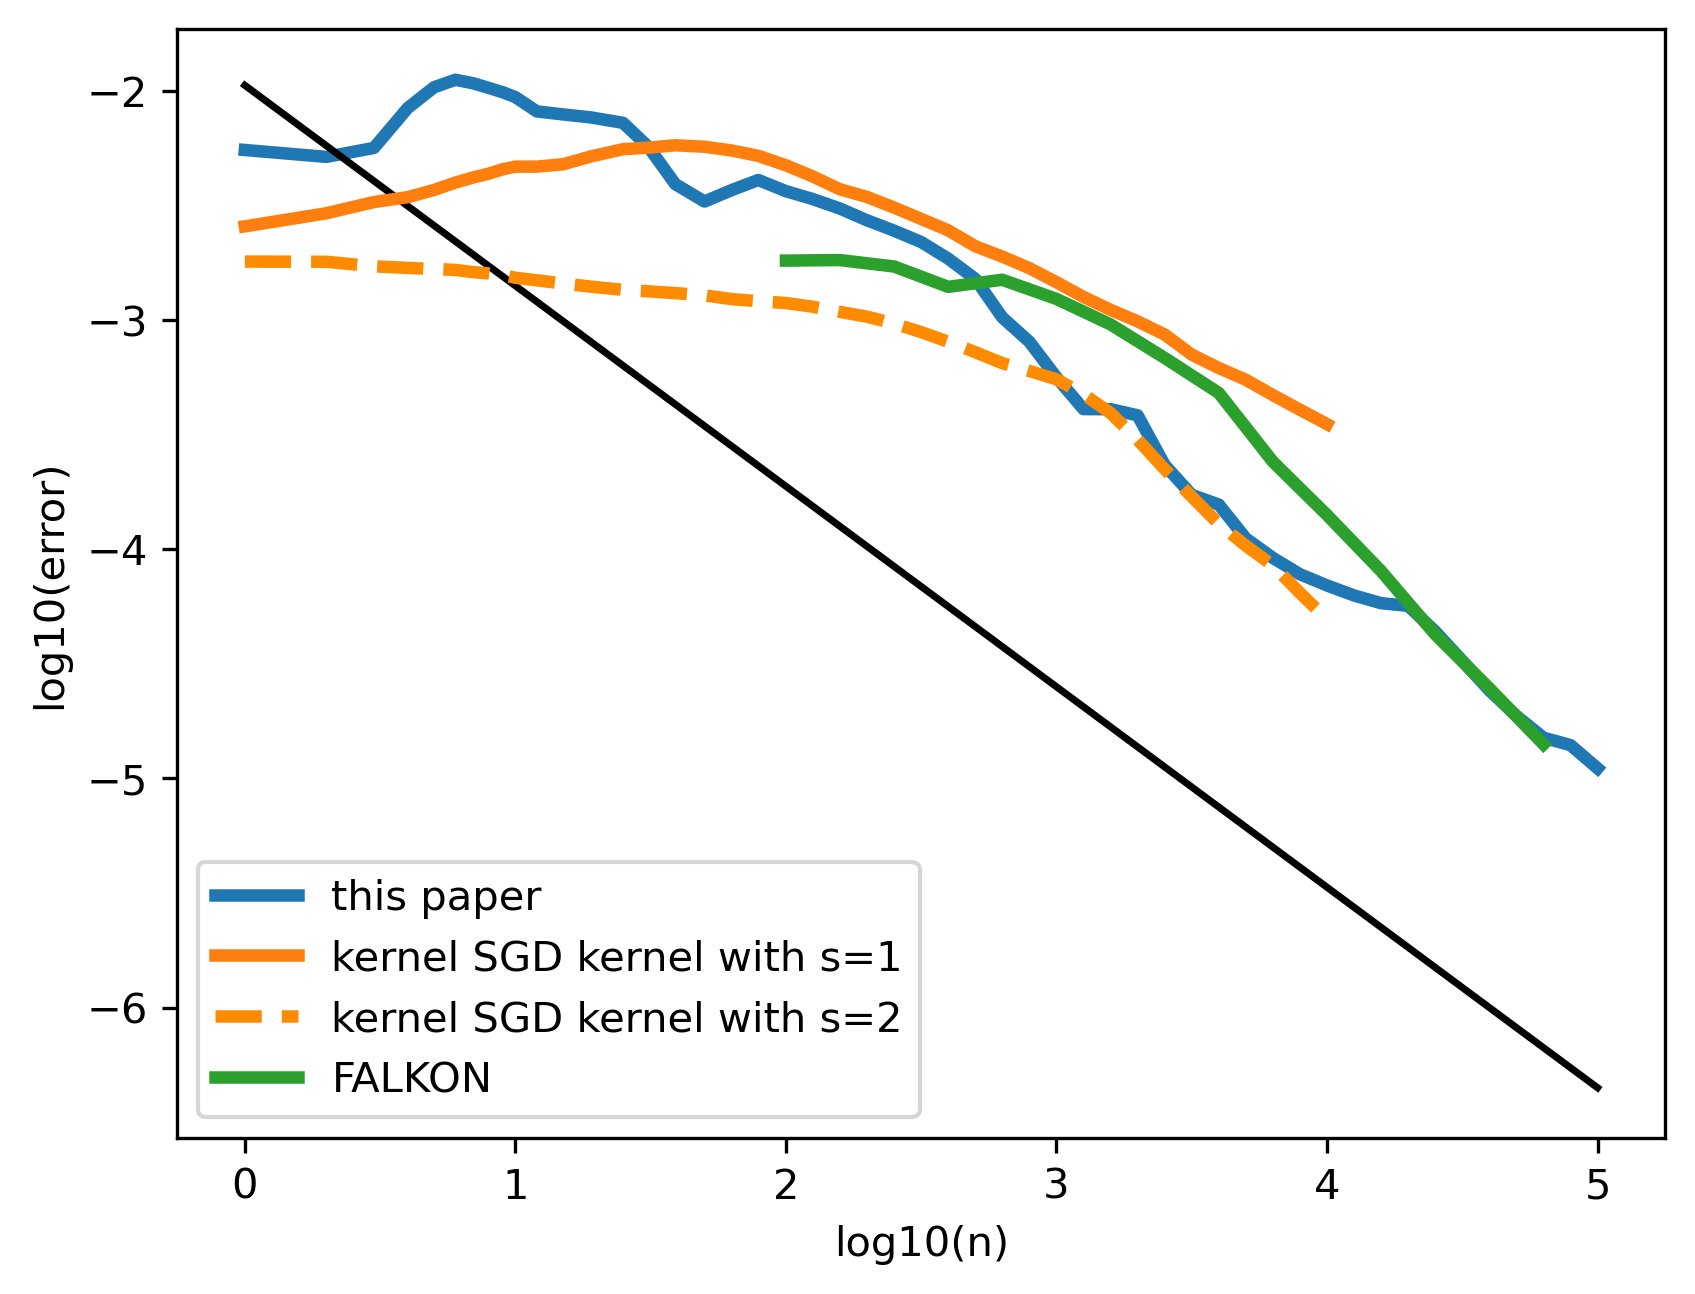

In [369]:
s = 1
r = 7/4
Y = [ X_sgd[0] - (4*s*r/(4*s*r+1))*(i-sgd[0]) for i in X_sgd]
plt.figure(dpi=300)
plt.plot(X_sgd,sgd,label='this paper',linewidth =3.0)
plt.plot(X_sgd,Y,linewidth =1.7,color = 'black')
plt.plot(X_sgd[:40],RKHS_B2,label='kernel SGD kernel with s=1',linewidth =3.0)
plt.plot(X_sgd[:40],RKHS_B4,label='kernel SGD kernel with s=2',linewidth =3.0,linestyle='--',color='darkorange')
plt.plot(BBB,FALKON_log,label ='FALKON',linewidth =3.0)
plt.xlabel('log10(n)')
plt.ylabel('log10(error)')
plt.legend()
plt.show()

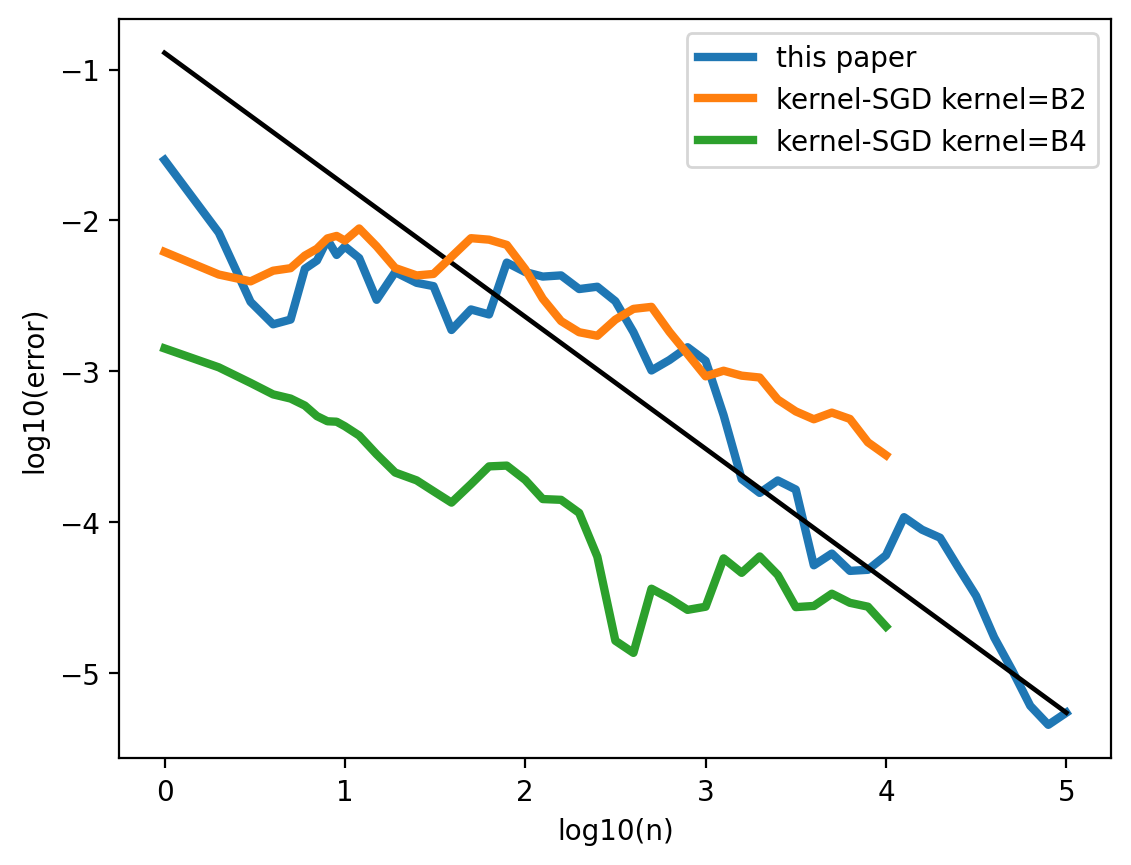

In [34]:
s = 1
r = 7/4
X_RKHS_B2 = [ RKHS_B2[i] for i in range(len(RKHS_B2))]
Z_RKHS_B2 = [ RKHS_B2[i][1] for i in range(len(RKHS_B2))]
Z_RKHS_B4 = [ RKHS_B4[i][1] for i in range(len(RKHS_B4))]
Y = [ sgd[-1][-1] - (4*s*r/(4*s*r+1))*(i-X_sgd[-1]) for i in X_sgd]
plt.figure(dpi=200)
plt.plot(X_sgd,sgd,label='this paper',linewidth =3.0)
plt.plot(X_sgd,Y,linewidth =1.7,color = 'black')
plt.plot(X_RKHS_B2,Z_RKHS_B2,label='kernel-SGD kernel=B2',linewidth =3.0)
plt.plot(X_RKHS_B2,Z_RKHS_B4,label='kernel-SGD kernel=B4',linewidth =3.0)
plt.xlabel('log10(n)')
plt.ylabel('log10(error)')
plt.legend()
plt.show()

In [156]:
SGDs = Conclusion[2]
RKHSs = Conclusion[3]

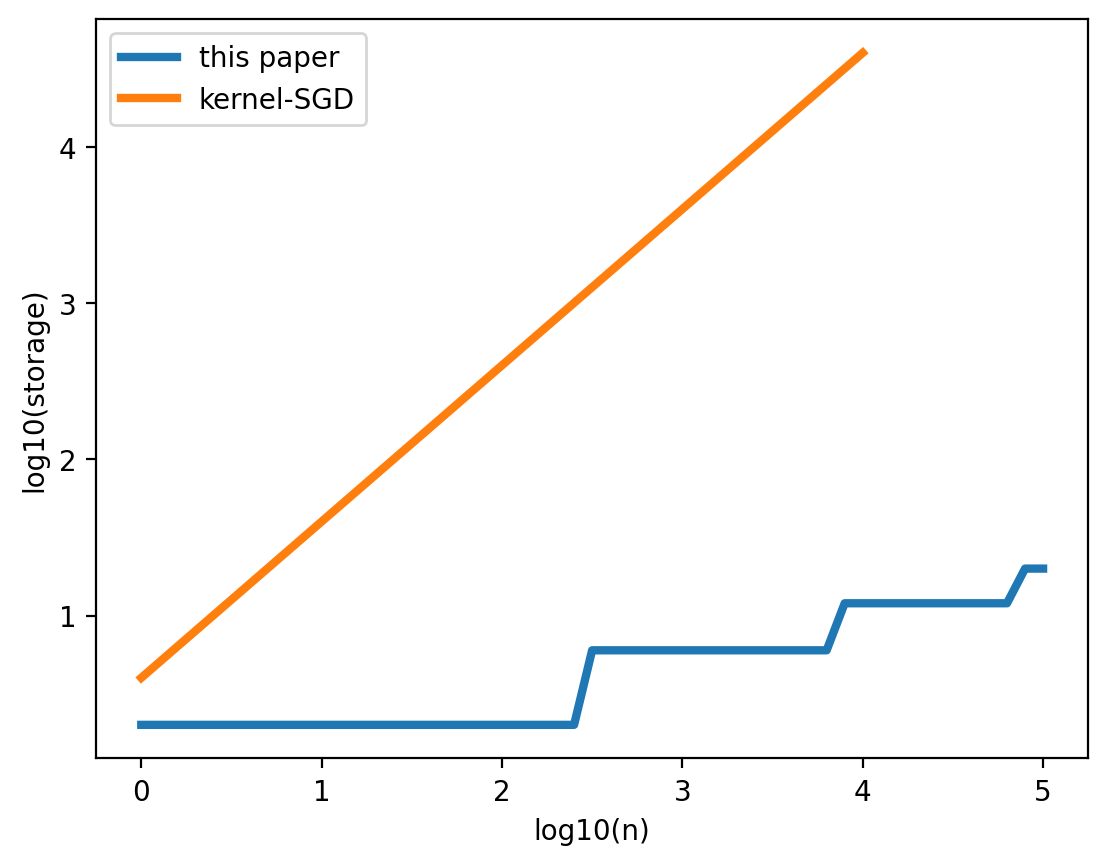

In [69]:
SGDs = Conclusion[3]
RKHSs = Conclusion[4]
X_sgd = [ SGDs[i][0] for i in range(len(SGDs))]
Z_sgd = [ SGDs[i][1] for i in range(len(SGDs))]
X_RKHS = [ RKHSs[i][0] for i in range(len(RKHSs))]
Z_RKHS = [ RKHSs[i][1] for i in range(len(RKHSs))]
plt.figure(dpi=200)
plt.plot(X_sgd,Z_sgd,label='this paper',linewidth =3.0)
plt.plot(X_RKHS,Z_RKHS,label='kernel-SGD',linewidth =3.0)
plt.xlabel('log10(n)')
plt.ylabel('log10(storage)')
plt.legend()
plt.show()

In [312]:

T_SGD_time_log = [math.log10(i) for i in T_SGD_time]
RKHS_SGD_time_log = [math.log10(i) for i in RKHS_SGD_time]
FALKON_time_log = [math.log10(i) for i in FALKON_time]

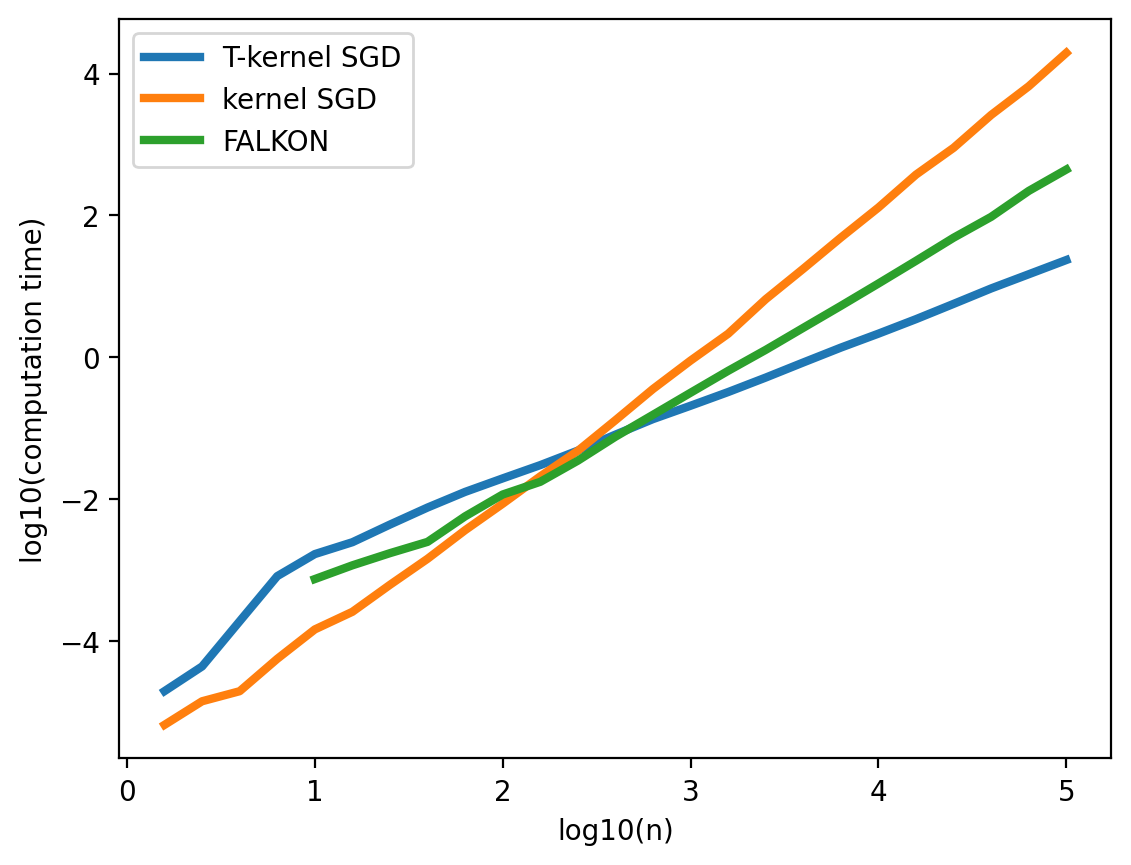

In [313]:
X = [i/5 for i in range(1,26)]
plt.figure(dpi=200)
plt.plot(X,T_SGD_time_log,label='T-kernel SGD',linewidth =3.0)
plt.plot(X[0:26],RKHS_SGD_time_log,label='kernel SGD',linewidth =3.0)
plt.plot(X[4:],FALKON_time_log,label='FALKON',linewidth =3.0)
plt.xlabel('log10(n)')
plt.ylabel('log10(computation time)')
plt.legend()
plt.show()

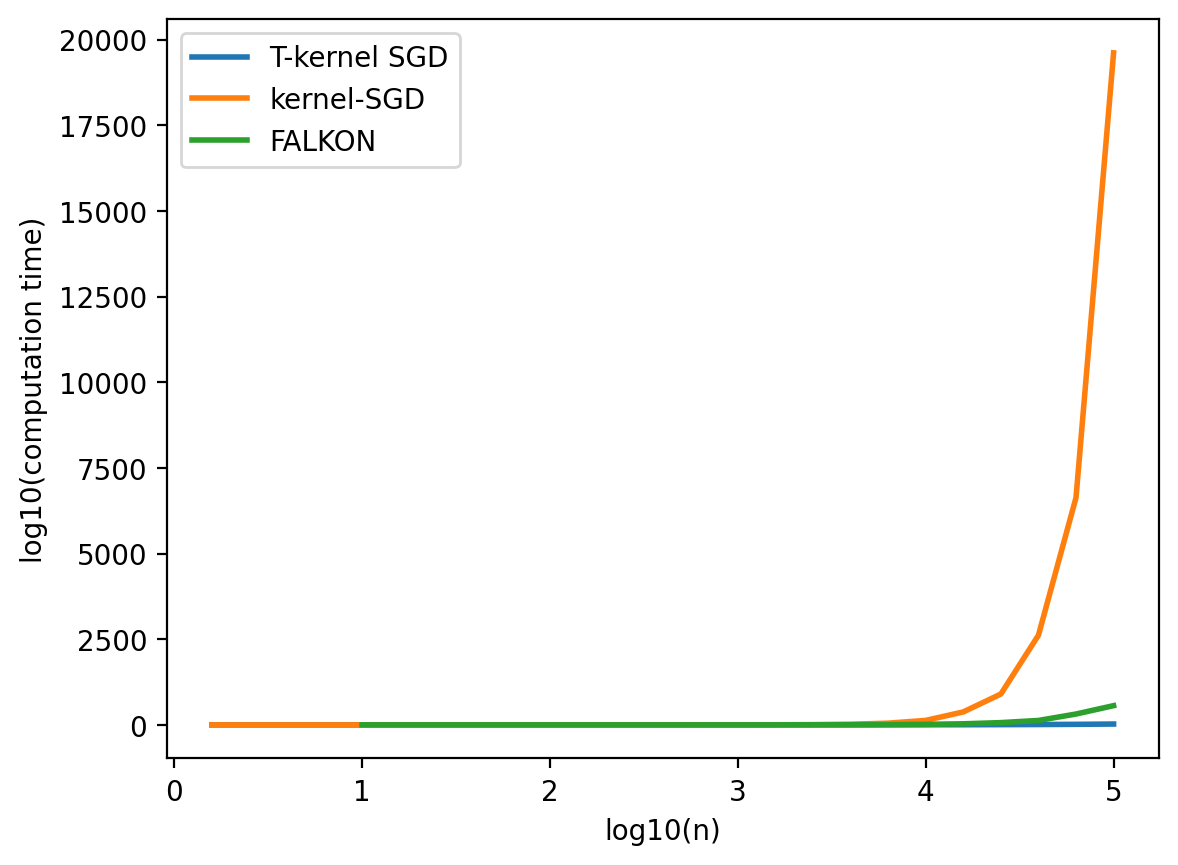

In [191]:
X = [i/5 for i in range(1,26)]
plt.figure(dpi=200)
plt.plot(X,T_SGD_time,label='T-kernel SGD',linewidth =2.0)
plt.plot(X[0:26],RKHS_SGD_time,label='kernel-SGD',linewidth =2.0)
plt.plot(X[4:],FALKON_time,label='FALKON',linewidth =2.0)
plt.xlabel('log10(n)')
plt.ylabel('log10(computation time)')
plt.legend()
plt.show()

In [1]:
#coding=gbk
import math
import random
import matplotlib.pyplot as plt
import time
from decimal import *
getcontext().prec=36
class algorithm():
    def __init__(self,theta,s,r,gamma,L):
        self.Tn_1 = [[Decimal(1)]]
        self.Tn = [[Decimal(0)],[Decimal(1),Decimal(1)]]
        self.fn = [[Decimal(0)]]
        self.fnbar = [[Decimal(0)]]
        self.Zt = [[Decimal(1)]]
        self.Ln = 0
        self.n = 1
        self.theta = theta
        self.s = s
        self.r = r
        self.gamma = gamma
        self.ZnX = []
        self.f_star = [[Decimal(1)/(Decimal(j)) for i in range(j)] for j in range(1,L+2)]
        self.Su = []
        self.Time = []
        self.storage = []
        self.cc_B4 = -math.pi**4/48
        
    def renew(self):
        self.Tn_1 = [[Decimal(1)]]
        self.Tn = [[Decimal(0)],[Decimal(1),Decimal(1)]]
        self.fn = [[Decimal(0)]]
        self.fnbar = [[Decimal(0)]]
        self.Zt = [[Decimal(1)]]
        self.Ln = 0
        self.n = 1
        self.ZnX = []
        self.Su = []
        self.Time = []
        self.storage = []
    
    def updating_Zt(self):
        if self.Ln > 1:	
            omega_Ln = (2*self.Ln+1)**(-2*self.s)
            TN = []
            self.Zt.append([Decimal(0) for i in range(self.Ln+1)])
            for i in range(2):
                self.Tn_1.append([Decimal(0) for j in range(self.Ln+i)])
            TN.append([-self.Tn_1[0][0]])
            self.Zt[0][0] += omega_Ln*TN[0][0]
            for i in range(1,self.Ln+1):
                D = self.Tn[i-1][:]
                D.insert(0,Decimal(0))
                E = self.Tn[i-1][:]
                E.append(Decimal(0))
                TN.append([ 2*(j+k)-l for j,k,l in zip(D,E,self.Tn_1[i])])
                self.Zt[i] = [ j + omega_Ln*k for j,k in zip(self.Zt[i],TN[-1])]
            self.Tn_1 = self.Tn[:]
            self.Tn = TN[:]
        elif self.Ln == 0:
            self.Zt = [[Decimal(1)]]
        elif self.Ln == 1:
            self.Zt.append([(Decimal(2*self.Ln+1))**(-2*self.s)*i for i in self.Tn[-1]])
            
    def fn_cal(self,x1,x2):
        fx = self.fn[0][0]
        L = len(self.fn)
        Xi = [Decimal(1)]
        for i in range(1,L):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            fx += sum([j*k for j,k in zip(Xi,self.fn[i])])
        return fx
    
    def fnbar_cal(self,x1,x2):
        fx = self.fnbar[0][0]
        L = len(self.fnbar)
        Xi = [Decimal(1)]
        for i in range(1,L):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            fx += sum([j*k for j,k in zip(Xi,self.fnbar[i])])
        return fx

    def ZnXcal(self,x1,x2):
        self.ZnX = [self.Zt[0][:]]
        Xi = [Decimal(1)]
        L = len(self.Zt)
        for i in range(1,L):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            self.ZnX.append([ j*k for j,k in zip(self.Zt[i],Xi)])

    def ZnT(self,x1,x2):
        self.ZnXcal(x1,x2)
        S = self.ZnX[0][0]
        Xi = [Decimal(1)]
        for i in range(1,len(self.ZnX)):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            S += sum([ j*k for j,k in zip(self.ZnX[i],Xi)])
        return S 
    def algorithm_f(self,X,Y):
        coe = self.gamma*(Y - self.fn_cal(X[0],X[1]))
        if self.Ln+2 < self.n**self.theta:
            self.Ln += 1 
            self.updating_Zt()
            B = [Decimal(0) for i in range(self.Ln+1)]
            self.fn.append(B[:])
            self.fnbar.append(B[:])
        self.ZnXcal(X[0],X[1])
        for l in range(self.Ln+1):
            self.fn[l] = [ j + coe*k for j,k in zip(self.fn[l],self.ZnX[l])]
            self.fnbar[l] = [ Decimal(self.n)*j/(Decimal(self.n) + 1) + k/(Decimal(self.n) + 1) for j,k in zip(self.fnbar[l],self.fn[l])]

    def grho_cal(self,theta):
        t = theta/(2*math.pi)
        return (t**2-t+1/6)/2 
        
    def construct_data(self):
        theta = 2*math.pi*random.random()
        Y = self.grho_cal(theta)
        Z = Y + random.gauss(0,0.5)
        return [theta,Z,Y]
    
    """def fstar_cal(self,x1,x2):
        fx = self.f_star[0][0]
        L = len(self.f_star)
        Xi = [Decimal(1)]
        for i in range(1,L):
            x2i = Xi[-1]
            Xi = [ x1*j for j in Xi]
            Xi.append(x2i*x2)
            fx += sum([j*k for j,k in zip(Xi,self.f_star[i])])
        return fx

    def construct_data(self):
        angle = 2*math.pi*random.random()
        X = [Decimal(math.cos(angle)),Decimal(math.sin(angle))]
        Y = self.fstar_cal(X[0],X[1])
        Z = Y + Decimal(random.uniform(-0.2,0.2))
        return [X,Z,Y]"""

    """def computation(self):
        Lf = len(self.fn)
        Ls = len(self.f_star)
        S = Decimal(0)
        if Lf <= Ls :
            for i in range(Lf):
                S += sum([(k-j)**2 for k,j in zip(self.fn[i],self.f_star[i])])
            for i in range(Lf-1,Ls):
                S += sum([j**2 for j in self.f_star[i]])
        else:
            for i in range(Ls):
                S += sum([(k-j)**2 for k,j in zip(self.fn[i],self.f_star[i])])
            for i in range(Ls-1,Lf):
                S += sum([j**2 for j in self.fn[i]])
        return S"""

    def updating(self,n):
        e = self.Ln
        for i in range(n):
            self.n = i
            Data = self.construct_data()
            self.X = [Decimal(math.cos(Data[0])),Decimal(math.sin(Data[0]))]
            self.algorithm_f(self.X,Decimal(Data[1]))
            if (self.n+1)%10001==0:
                #print('b',self.computation())
                print('a',self.Ln)
                print(i/10001)
            '''if self.n%500 == 0:
                end_time = time.time()
                run_time = end_time - start_time 
                self.Time.append(math.log10(float(run_time+10**(-8))))
                S = 0
                for j in range(1000):
                    Z = self.construct_data()
                    S +=(self.fnbar_cal(Z[0][0],Z[0][1])-Z[2])**2
                self.Su.append(Decimal(math.log10(S/200)))
                self.storage.append(math.log10(sum([len(kk) for kk in self.fnbar])+10**(-8)))
                start_time = time.time()'''
        return [self.Su,self.Time,self.storage]

In [2]:
class RKHS_algorithm():
    def __init__(self,gamma0,t):
        self.gamma0 = gamma0
        self.gamma = self.gamma0
        self.t = t
        self.gn = []
        self.gnbar = []
        self.n = 1
        self.cc_B4 = -math.pi**4/48
        self.cc_B2 = math.pi**2/4
    def renew(self):
        self.gn = []
        self.gnbar = []
        self.n = 1
        
    def Z_cal_B2(self,theta1,theta2):
        t = abs(theta2-theta1)/(2*math.pi)
        t = (t -int(t))
        y = t**2-t+1/6
        return y*self.cc_B2
    
    def Z_cal_B4(self,theta1,theta2):
        t = abs(theta2-theta1)/(2*math.pi)
        t = (t -int(t))
        y = t**4-2*(t**3)+t**2-1/30
        return y*self.cc_B4
    
    def gn_cal_B4(self,theta):
        S = 0
        for A in self.gn:
            S += A[0]*self.Z_cal_B4(A[1],theta)
        return S
    
    def gnbar_cal_B4(self,theta):
        S = 0
        for A in self.gnbar:
            S += A[0]*self.Z_cal_B4(A[1],theta)
        return S
    
    def gn_cal_B2(self,theta):
        S = 0
        for A in self.gn:
            S += A[0]*self.Z_cal_B2(A[1],theta)
        return S
    
    def gnbar_cal_B2(self,theta):
        S = 0
        for A in self.gnbar:
            S += A[0]*self.Z_cal_B2(A[1],theta)
        return S
    
    def grho_cal(self,theta):
        t = theta/(2*math.pi)
        return (t**4-2*(t**3)+t**2-1/30)*self.cc_B4
    
    def construct_data(self):
        theta = 2*math.pi*random.random()
        Y = self.grho_cal(theta)
        Z = Y + random.gauss(0,0.5)
        return [theta,Z,Y]
    
    def algorithm_B2(self,theta,Y):
        gamma = self.gamma0*(self.n**(-0.5))
        an = -gamma*(self.gn_cal_B2(theta)-Y)
        self.gn.append([an,theta][:])
        self.gnbar.append([0,0])
        self.gnbar = [[(self.n*b[0]+a[0])/(self.n+1),a[1]] for a,b in zip(self.gn,self.gnbar)]
        
    def algorithm_B4(self,theta,Y):
        gamma = self.gamma*(self.n**(-0.5))
        an = -gamma*(self.gn_cal_B4(theta)-Y)
        self.gn.append([an,theta])
        self.gnbar.append([0,0])
        self.gnbar = [[(self.n*b[0]+a[0])/(self.n+1),a[1]] for a,b in zip(self.gn,self.gnbar)]  
    
    def updating(self,n):
        for i in range(n):
            Data = self.construct_data()
            self.gamma = self.gamma0*((i+1)**(-self.t))
            self.algorithm_B4(Data[0],Data[1])
    

In [5]:
s = Decimal(1)
r = Decimal(3/4)
gamma1 = Decimal(30)/100
theta = 1/(4*s*r+1)
gamma = 1
ALG_sgd = algorithm(theta,s,r,gamma1,10)
ALG_RKHS_B2 = RKHS_algorithm(gamma,0)
ALG_RKHS_B4 = RKHS_algorithm(gamma,0)

def update(n,T,C):
    
    TT = [10**(i/10) for i in range(10,51)]
    TT= [i for i in range(1,10)] + TT  
    sgd = []
    RKHS_B2 = []
    RKHS_B4 = []
    RKHS_sc_B2 = []
    RKHS_sc_B4 = []
    sgd_sc = []
    t = 0
    for i in range(1,n+1):
        ALG_sgd.n = i
        ALG_RKHS_B2.n = i
        ALG_RKHS_B4.n = i
        Data = ALG_RKHS_B2.construct_data()
        if ALG_RKHS_B2.n <= 10000:
            ALG_RKHS_B2.algorithm_B2(Data[0],Data[1])
            ALG_RKHS_B4.algorithm_B4(Data[0],Data[1])
        X = [Decimal(math.cos(Data[0])),Decimal(math.sin(Data[0]))]
        ALG_sgd.algorithm_f(X,Decimal(Data[1]))
        if i == int(TT[t]):
            S_sgd = 0
            S_RKHS_B2 =0
            S_RKHS_B4 =0
            for j in range(T):
                Data = ALG_RKHS_B2.construct_data()
                if i<=10000:
                    S_RKHS_B2 +=(ALG_RKHS_B2.gnbar_cal_B2(Data[0])-Data[2])**2
                    S_RKHS_B4 +=(ALG_RKHS_B4.gnbar_cal_B4(Data[0])-Data[2])**2
                X = [Decimal(math.cos(Data[0])),Decimal(math.sin(Data[0]))]
                S_sgd +=(float(ALG_sgd.fnbar_cal(X[0],X[1]))-Data[2])**2
            if i <=10000:
                RKHS_B2.append(math.log10(S_RKHS_B2/T))
                RKHS_B4.append(math.log10(S_RKHS_B4/T))
                #RKHS.append([math.log10(i),math.log10(ALG_RKHS.norms())])
                RKHS_sc_B2.append([math.log10(i),math.log10(4*len(ALG_RKHS_B2.gnbar))])
                RKHS_sc_B4.append([math.log10(i),math.log10(4*len(ALG_RKHS_B4.gnbar))])
            sgd_sc.append([math.log10(i),math.log10(sum([2*len(k) for k in ALG_sgd.fnbar]))])   
            sgd.append(math.log10(S_sgd/T))
            print(i,math.log10(i),sgd[-1],RKHS_B2[-1],RKHS_B4[-1])
            t = t+1
    return [sgd,RKHS_B2,RKHS_B4,sgd_sc,RKHS_sc_B2,RKHS_sc_B4]

Conclusion = update(100000,1000,0)

1 0.0 -2.6914109601355403 -2.6810751400842676 -2.687737121465194
2 0.3010299956639812 -2.4633879318178824 -3.0363703090542367 -2.7854377154356564
3 0.47712125471966244 -2.3333628645394495 -3.2044214835957754 -2.8241961543567546
4 0.6020599913279624 -2.4237647325667124 -3.324561759728144 -2.8538139785815044
5 0.6989700043360189 -2.5949781071517934 -3.286225644403864 -2.852427936189574
6 0.7781512503836436 -2.6214108010550996 -3.268343119809843 -2.8262543354115333
7 0.8450980400142568 -2.6861276426515386 -3.290908030672614 -2.8560889901659743
8 0.9030899869919435 -2.491517370373759 -3.172134931772096 -2.8329574004374414
9 0.9542425094393249 -2.248214721660735 -3.0504003457176943 -2.8297904792229396
10 1.0 -2.134205781067233 -2.954958031417074 -2.826028531267989
12 1.0791812460476249 -1.7994119082311288 -2.9807773051960944 -2.8547525529478883
15 1.1760912590556813 -1.7811226470955437 -2.804403717612506 -2.836321122227774
19 1.2787536009528289 -1.7223245806962233 -2.563788141473294 -2.8201